<a href="https://colab.research.google.com/github/andreyprm/PYTN_Prakerja_9_014/blob/main/PTYN_Prakerja_AndreasYogaParama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b>Hacktiv8 Kartu Prakerja Final Project Notebook</b>
    
Dalam notebook ini saya mengerjakan proyek akhir dari <b> Hacktiv8 Kartu Prakerja course "Belajar Mengembangkan Model Database dengan Python untuk Menjadi Analis Database"</b>.\
Dataset yang dipakai berjudul "Heart Disease UCI" yang diunduh dari : \
https://www.kaggle.com/ronitf/heart-disease-uci

<b>by : Andreas Yoga Parama\
PYTN-PKJ-09-014</b>


<b>Feature attribute information</b>

1.	age: usia dalam tahun
2.	sex: jenis kelamin (1 = laki-laki, 0 = perempuan)
3.	cp: tipe penyakit dada yg dialami (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
4.	trestbps: tekanan darah kondisi normal (mm Hg saat masuk rumah sakit)
5.	chol: tingkat kolestrol dalam mg/dl
6.	fbs: gula darah dalam kondisi puasa (> 120 mg/dl, 1 = true; 0 = false)
7.	restecg: pengukuran elektrokardiograf
<br>(0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
8.	thalach: jumlah detak jantung maksimum
9.	exang: Exercise induced angina (1 = yes; 0 = no)
10.	oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
11.	slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
12.	ca: The number of major vessels (0-3)
13.	thal: kelainan darah berupa thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
14.	target: keadaan penyakit jantung (0 = no/tidak ada, 1 = yes/ada)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### import dataset

In [2]:
url_a = 'https://drive.google.com/file/d/1mJ-noOJI3CmBdGdttYdWDC5lxT4zM-9z/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url_a.split('/')[-2]
df = pd.read_csv(url)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


dari informasi diatas diketahui bahwa dataset terdiri atas 303 baris/entri dan tidak mengandung data kosong atau null value. Jenis data semuanya numerik, meskipun ada yang berupa data kontinu dan ada yang diskrit(kategori).

## Data Explorations

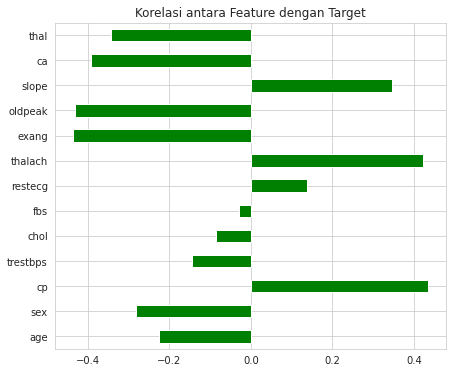

In [5]:
df_corr = df.corr()['target'][:-1]

plt.figure(figsize=(7,6))
df_corr.plot(kind='barh', color='green')
plt.title('Korelasi antara Feature dengan Target')
plt.show()

grafik diatas menunjukkan kolom feature dengan korelasi tertinggi terhadap target

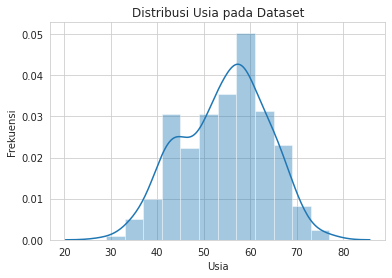

In [6]:
sns.distplot(df['age'])
plt.title("Distribusi Usia pada Dataset")
plt.xlabel("Usia")
plt.ylabel("Frekuensi")
plt.show()

Grafik diatas menunjukkan distribusi usia dari dataset yang mana dapat disimpulkan data dalam distribusi normal (garis membentuk seperti lonceng) atau bell-curve. 

<b>Perbandingan Target Positif dan Negatif dalam Data.</b>

In [7]:
df_g = df

df_g['target'] = df_g['target'].map({0:'Negative',
                                     1:'Positive'})

df_g['sex'] = df_g['sex'].map({0:'Perempuan',
                               1:'Laki-Laki'})

target class count :
Positive    165
Negative    138
Name: target, dtype: int64


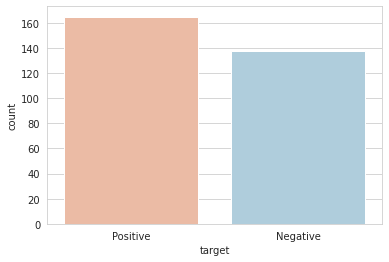

In [8]:
print('target class count :')
print(df_g['target'].value_counts())

graph1 = sns.countplot(df_g['target'],palette="RdBu")
plt.show()

dari data diatas dapat diambil kesimpulan bahwa proporsi antara kelas positif dan negatif tidak terlalu timpang. Selisih 27 entri data dalam pandangan saya masih dapat ditoleransi untuk kasus ini sehingga tidak dilakukan pre-proses data dengan oversampling.

Laki-Laki    207
Perempuan     96
Name: sex, dtype: int64 



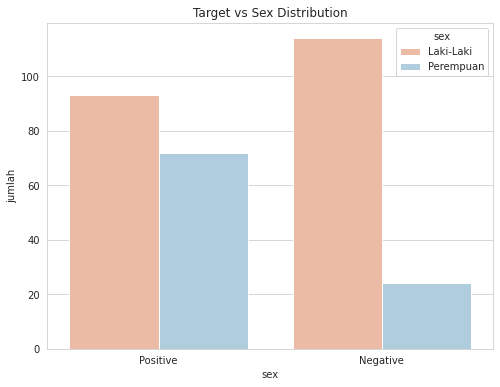

In [9]:
print(df_g['sex'].value_counts(),'\n')

plt.figure(figsize=(8,6))
sns.countplot(data=df, x='target',hue='sex', palette="RdBu")
plt.title("Target vs Sex Distribution")
plt.xlabel("sex")
plt.ylabel("jumlah")
plt.show()

dari grafik diatas dapat diambil kesimpulan awal bahwa laki-laki memiliki kecenderungan lebih tinggi untuk memiliki penyakit jantung dibanding perempuan. Namun, kesimpulan ini dapat terjadi bias karena dalam dataset ini jumlah populasi laki-laki lebih dominan daripada perempuan. 

### Cleaning Outlier

membersihkan outlier di dua kolom yaitu trestbps dan chol yang meiliki data pencilan yang cukup jauh diatas batas atas data.

AxesSubplot(0.125,0.125;0.775x0.755)


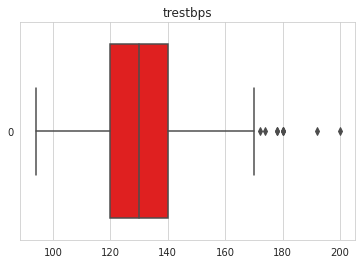

AxesSubplot(0.125,0.125;0.775x0.755)


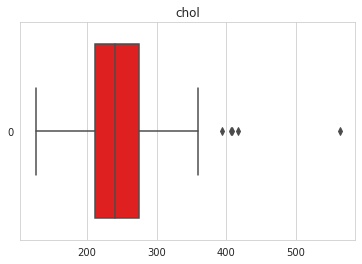

In [10]:
c = ['trestbps','chol']

for i in c:
    print(sns.boxplot(data=df[i], orient="h", color='red'))
    plt.title(i)
    plt.show()

In [11]:
Q1 = np.percentile(df['chol'], 25)
Q3 = np.percentile(df['chol'], 75)
IQR = Q3-Q1
up_limit_ch = Q3 + (1.5 * IQR) 
lo_limit_ch = Q1 - (1.5 * IQR)

In [12]:
Q1 = np.percentile(df['trestbps'], 25)
Q3 = np.percentile(df['trestbps'], 75)
IQR = Q3-Q1
up_limit_tr = Q3 + (1.5 * IQR) 
lo_limit_tr = Q1 - (1.5 * IQR)

In [13]:
df_a = df[(df['trestbps'] > lo_limit_tr) & (df['trestbps'] < up_limit_tr) & (df['chol'] > lo_limit_ch) & (df['chol'] < up_limit_ch)]

AxesSubplot(0.125,0.125;0.775x0.755)


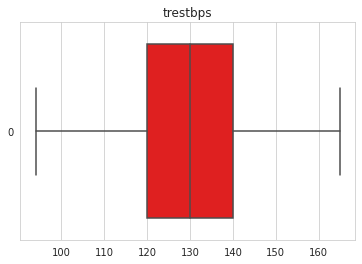

AxesSubplot(0.125,0.125;0.775x0.755)


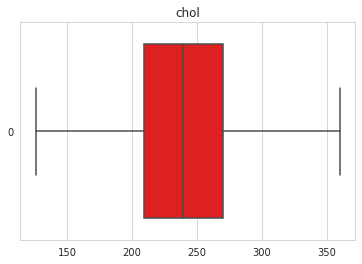

In [14]:
for i in c:
    print(sns.boxplot(data=df_a[i], orient="h", color='red'))
    plt.title(i)
    plt.show()

setelah kita menghapus outlier maka terlihat data di dua kolom tersebut sudah bersih dari data pencilan dimana sudah tidak ada point data yang jauh melewati garis batas atas maupun batas bawah. Data yang sudah bersih dari pencilan ini dapat digunakan untuk melatih learning model.

### Train Test Split

Train test split digunakan untuk memisahkan data antara data latihan (x_traini, y_train) dan data testing (y_test, x_test). Saya membagi data dengan proporsi 70 : 30 dan menggunakan random state 101 untuk mengacak pengambilan data.

Langkah yang pertama dilakukan adalah memastikan semua feature di dalam dataset direkam dalam format numerik, karena sebelumnya ada dua kolom yang kita ubah value nya untuk memudahkan visualisasi maka di langkah ini kita kembalikan ke dalam numerik, berupa kategori 0 dan 1. cara ini dapat digunakan apabila jumlah value unik data sedikit. Bisa juga menggunakan pd.get_dummies yang akan membagi data non-numerik ke dalam beberapa tabel baru dengan kategori 0 (tidak) atau 1(ya) untuk menyatakan entri tesrebut masuk dalam kategori mana.

In [15]:
df_a['target'] = df_a['target'].map({'Positive':1
                                 ,'Negative':0})

df_a['sex'] = df_a['sex'].map({'Perempuan':0,
                           'Laki-Laki':1})

In [16]:
feature = df_a.drop('target', axis=1)
target  = df_a['target']

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(feature, target, random_state=101, test_size=0.3)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
df_a

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

LogisticRegression()

In [22]:
prediction_lr = model_lr.predict(x_test)
print(classification_report(y_test, prediction_lr))

              precision    recall  f1-score   support

           0       0.94      0.70      0.80        47
           1       0.73      0.95      0.82        39

    accuracy                           0.81        86
   macro avg       0.83      0.83      0.81        86
weighted avg       0.84      0.81      0.81        86



### AUC ROC Graph

In [23]:
from sklearn.metrics import roc_curve, auc

In [24]:
probs = model_lr.predict_proba(x_test)
probability = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, probability, pos_label=1)
auc_score = auc(fpr, tpr)
auc_score

0.8914348063284234

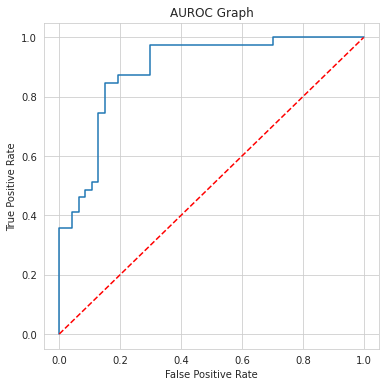

In [25]:
plt.figure(figsize=(6,6))
plt.title('AUROC Graph')
plt.plot(fpr, tpr, label='AUC : {}'.format(round(auc_score,2)))
plt.plot([0,1], label='no skill', color='red', ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


Grafik AUC - ROC digunakan untuk menggambarkan performansi model. \
Garis merah menunjukkan batas minimum model (50:50) dimana model dengan performa setara atau bahkan dibawah ini merupakan model yang jelek, karena prediksinya tidak akurat dan hampir mirip dengan tebakan dengan peluang fifty-fifty. \
Garis biru menunjukkan skor AUC dilihat dari tingkat akurasi true positive, semakin garis ini membentuk sudut siku, maka performa model karena mendekati angka sempurna (1.0)

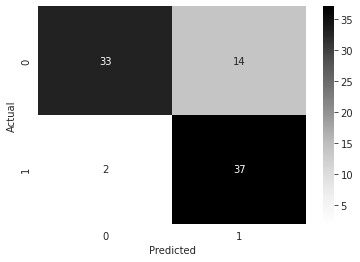

In [26]:
data = {'y_Actual':    y_test,
        'y_Predicted': prediction_lr
        }

df_conf = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
matrix = pd.crosstab(df_conf['y_Actual'], df_conf['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
matrix
sns.heatmap(matrix, annot=True, cmap='Greys')
plt.show()

Confusion Matrix menunjukkan hasil dari prediksi model di dalam 4 kuadran untuk melihat jumlah data yang diprediksi benar dan yang diprediksi salah.

### Decision Tree Classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [29]:
prediction_dt = model_dt.predict(x_test)
print(classification_report(y_test, prediction_dt))

              precision    recall  f1-score   support

           0       0.72      0.62      0.67        47
           1       0.61      0.72      0.66        39

    accuracy                           0.66        86
   macro avg       0.67      0.67      0.66        86
weighted avg       0.67      0.66      0.66        86



### KN Neighbors Classifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
model_kn = KNeighborsClassifier()
model_kn.fit(x_train, y_train)

KNeighborsClassifier()

In [32]:
prediction_kn = model_kn.predict(x_test)
print(classification_report(y_test, prediction_kn))

              precision    recall  f1-score   support

           0       0.70      0.55      0.62        47
           1       0.57      0.72      0.64        39

    accuracy                           0.63        86
   macro avg       0.64      0.64      0.63        86
weighted avg       0.64      0.63      0.63        86



### Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [35]:
prediction_rf = model_rf.predict(x_test)
print(classification_report(y_test, prediction_rf))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81        47
           1       0.74      0.90      0.81        39

    accuracy                           0.81        86
   macro avg       0.82      0.82      0.81        86
weighted avg       0.83      0.81      0.81        86



### Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB

In [37]:
model_nb = GaussianNB()
model_nb.fit(x_train, y_train)

GaussianNB()

In [38]:
prediction_nb = model_nb.predict(x_test)
print(classification_report(y_test, prediction_nb))

              precision    recall  f1-score   support

           0       0.81      0.74      0.78        47
           1       0.72      0.79      0.76        39

    accuracy                           0.77        86
   macro avg       0.77      0.77      0.77        86
weighted avg       0.77      0.77      0.77        86



### Support Vector Machine

In [39]:
from sklearn.svm import SVC

In [40]:
model_sv = SVC()
model_sv.fit(x_train, y_train)

SVC()

In [41]:
prediction_sv = model_sv.predict(x_test)
print(classification_report(y_test, prediction_sv))

              precision    recall  f1-score   support

           0       0.75      0.32      0.45        47
           1       0.52      0.87      0.65        39

    accuracy                           0.57        86
   macro avg       0.63      0.60      0.55        86
weighted avg       0.64      0.57      0.54        86



### Pemilihan Model

dari kelima model yang dicoba diatas, \
Logistic Regression menunjukkan performa dengan akurasi dan recall yang baik. Aritnya,model ini mampu memberikan prediksi data dengan lebih akurat pada kelas positif maupun kelas negatif. Hasil dari confusion matrix yang menunjukkan False Negative rendah juga menunjukkan performa model ini. \
Dalam use case/kasus ini dimana kita menggunakan model untuk prediksi penyakit jantung. Oleh karena itu model diharapkan untuk memiliki akurasi bagus di true positive dan true negative sekaligus juga menekan jumlah false negative dan false postive. Meskipun akurasi model dibawah 90%, yang mana untuk prediksi dalam kasus kesehatan termasuk di bawah setandar, namun model ini masih dapat diandalkan karena penekanan jumlah False negative. \
Artinya model tidak 'meloloskan' pasien dengan penyakit jantung yang diprediksi tidak memiliki penyakit jantung sehingga mengurangi resiko orang dengan penyakit jantung yang tidak terdeteksi. adapun dengan false positive, dapat dilakukan tes ulang ataupun tes lain yang dapat lebih akurat memberikan prediksi. \
Performa baik model Logistic Regression salah satunya didukung oleh jumlah dataset yang kecil (301 entri) dan juga jumlah kolom feature yang sedikit (13 kolom) dengan jenis data yang seragam yaitu numerik. Model Logistic Regression memang memiliki keunggulan untuk mengolah data numerik dalam dimensi yang kecil sehingga dapat menghasilkan prediksi yang lebih akurat.
